In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol and parameters for the momentum strategy
symbol = 'AAPL'  # Ticker symbol of the asset
lookback_period = 5  # Number of days to look back for calculating momentum
entry_threshold = 0.05  # Minimum threshold for momentum to enter a position
exit_threshold = 0.01  # Threshold for momentum to exit a position

In [3]:
# Download historical price data using yfinance
data = yf.download(symbol, start='2021-03-01', end='2023-06-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate the daily returns
returns = data['Close'].pct_change()

In [5]:
# Calculate the rolling momentum
momentum = returns.rolling(lookback_period).sum()

In [6]:
# Initialize variables for tracking positions and P&L
position = 0
pnl = []

In [7]:
# Iterate over each trading day
for i in range(len(data)):
    # Check if an entry signal is triggered
    if momentum.iloc[i] > entry_threshold:
        # Enter a long position
        position = 1
    #elif momentum.iloc[i] < -entry_threshold:
        # Enter a short position
        #position = -1

    # Check if an exit signal is triggered
    elif abs(momentum.iloc[i]) < exit_threshold:
        # Exit the position
        position = 0

    # Calculate the daily P&L
    daily_pnl = position * returns.iloc[i]
    pnl.append(daily_pnl)


In [8]:
# Calculate cumulative P&L
cumulative_pnl = pd.Series(pnl).cumsum()

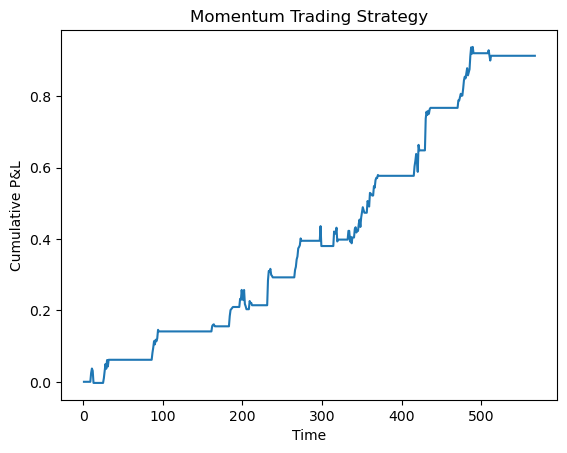

In [9]:
# Plot the cumulative P&L
plt.plot(cumulative_pnl)
plt.xlabel('Time')
plt.ylabel('Cumulative P&L')
plt.title('Momentum Trading Strategy')
plt.show()